In [1]:
import matplotlib.pyplot as plt
from pymaverick import spline
from pymaverick import solver as slv

In [7]:
mf = 4539
m0 = 12500

model_parameters = {
    'g' : 9.81,
    'c' : 1715,
    'sigma' : 0.0665,
    'h0' : 90000,

    #mass
    'mi' : m0,
    'mmin' : 0.8*mf,
    'mmax' : 1.2*m0,
    'mguess' : mf,

    # speed
    'Vi' : 0,
    'Vmin' : -1500,
    'Vmax' : 1500,
    'Vguess' : 300,

    #height
    'hi' : 0,
    'hmin' : 0,
    'hmax' : 200000,

    #Control
    'Fmin' : 0,
    'Fmax' : 1.9*9.81*m0,

    # time
    'Tmin' : 0,
    'Tmax' : 500,
    'Tguess' : 100,

    # target
    'wl1' : 0,
    'wm' : 1,
    'wlt' : 0,
    'wl2' : 1e-16, # to suppress oscillations: does not affect results at least up to 1e-5
}

In [8]:
solver_data = {
    'info_level' : 4,

    'Model' : {

        'Parameters' : model_parameters,

        'Scaling' : {
            'Phase0' : {
                'target' : 100,
                'states_and_controls' : "automatic-bounds", # V, h ,m,F
                'parameters' : "automatic-bounds", # T
                'fo_equations' : [20, 500, 60 ], # automatic bounds is not allowed for equations
                'boundary_conditions' : [500, 5000, 7000],
            },
        },

    },

    'Mesh' : {
        'max_iterations' : 10,
        'tolerance' : 1e-9,
        'Phase0' : {
           'Segments' : [ {'length' : 1, 'num_points' : 50} ],
        },
    },

    'Solver' : {
        'max_iterations' : 300,
        'nlp_solver' : "Ipopt",
        'IpoptOptions' : {
            'linear_solver' : "ma27",
            'ma57_automatic_scaling' : "yes",
            'mu_strategy' : "adaptive",
            'check_derivatives_for_naninf' : "yes",
        },
    },
}

In [5]:
solver = slv.Solver('./sources/libGoddardRocket.so')

In [9]:
output = solver.solve(solver_data)
sol = output['solution']['Phase0']

Setting up ocp problem ...
Setting up ocp problem ...
OCP model parameters detail:
   Vmin   -1.500000e+03
   Vmax    1.500000e+03
     Vi    0.000000e+00
 Vguess    3.000000e+02
   hmin    0.000000e+00
   hmax    2.000000e+05
     hi    0.000000e+00
   mmin    3.631200e+03
   mmax    1.500000e+04
     mi    1.250000e+04
 mguess    4.539000e+03
   Tmin    0.000000e+00
   Tmax    5.000000e+02
 Tguess    1.000000e+02
   Fmin    0.000000e+00
   Fmax    2.329875e+05
     h0    9.000000e+04
  sigma    6.650000e-02
      c    1.715000e+03
      g    9.810000e+00
    wl1    0.000000e+00
    wl2    1.000000e-16
     wm    1.000000e+00
    wlt    0.000000e+00

Setting up mesh ...
Setting up nlp scaling ...
Scaling factors details:
Phase0
	target: 100
	states and controls: 3000, 200000, 11368.8, 232988, 
	parameters: 500, 
	first order equations: 20, 500, 60, 
	boundary_conditions: 500, 5000, 7000, 
scaling options:
	multiply_lagrange_by_n.............false
	multiply_int_constr_by_n...........fa

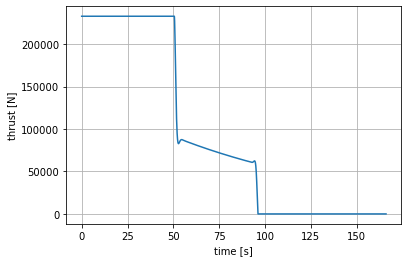

In [10]:
plt.figure()
plt.plot(sol['t'],sol['thrust']);
plt.xlabel('time [s]')
plt.ylabel('thrust [N]')
plt.grid(True)

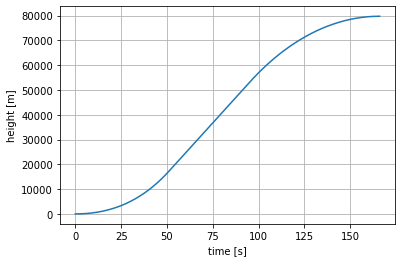

In [11]:
plt.figure()
plt.plot(sol['t'],sol['h'])
plt.xlabel('time [s]')
plt.ylabel('height [m]')
plt.grid(True)

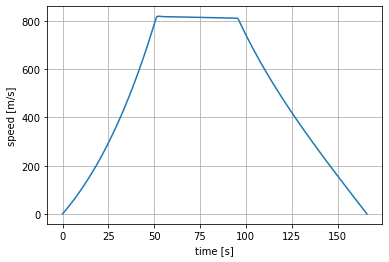

In [12]:
plt.figure()
plt.plot(sol['t'], sol['V'])
plt.xlabel('time [s]')
plt.ylabel('speed [m/s]')
plt.grid(True)